# -Circuito RC

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

## Simulação do circuito Passa-Baixa com 200 experimentos, de 10Hz a 2000Hz

Tratando os dados para plotar os graficos.

In [61]:
f = open("DadosRCtxt")
texto = f.readlines()

In [62]:
for i in range(0,len(texto)):
    texto[i] = texto[i].replace("\t", ";")
    texto[i] = texto[i].replace(",", ";")

In [64]:
f = open("DadosRCtxt", 'w')
f.writelines(texto)
f.close()

In [65]:
df = pd.read_csv("Draft1.txt", sep = ";")

In [67]:
df

,Freq,Real,Imaginaria
0,10.0,0.998892,-0.033264
1,20.0,0.995584,-0.066308
2,30.0,0.990118,-0.098915
3,40.0,0.982566,-0.130881
4,50.0,0.973024,-0.162013
...,...,...,...
195,1960.0,0.022935,-0.149696
196,1970.0,0.022708,-0.148971
197,1980.0,0.022484,-0.148253
198,1990.0,0.022264,-0.147541


Preparando o módulo

In [68]:
df["Modulo"] = np.sqrt((df["Real"]**2+df["Imaginaria"]**2))

Preparando o ganho 

In [69]:
df["Ganho"] = 20*np.log10(df["Modulo"])

Preparando a fase

In [70]:
df["Fase"] = np.arctan2(df["Imaginaria"],df["Real"])

In [71]:
df["Fase"] = (180/np.pi)*df["Fase"]

Parte real e imaginaria não são mais necessárias.

In [72]:
df = df.drop(["Real", "Imaginaria"], axis = 1)

In [73]:
df

,Freq,Modulo,Ganho,Fase
0,10.0,0.999446,-0.004813,-1.907295
1,20.0,0.997789,-0.019222,-3.810373
2,30.0,0.995047,-0.043130,-5.705070
3,40.0,0.991245,-0.076382,-7.587336
4,50.0,0.986420,-0.118764,-9.453277
...,...,...,...,...
195,1960.0,0.151443,-16.395002,-81.289426
196,1970.0,0.150692,-16.438196,-81.332969
197,1980.0,0.149948,-16.481182,-81.376082
198,1990.0,0.149211,-16.523960,-81.418772


In [126]:
f_c = float(df[abs(df["Ganho"]+3) < 0.01]["Freq"])
Gain_cut = float(df[abs(df["Ganho"]+3) < 0.01] ["Ganho"])

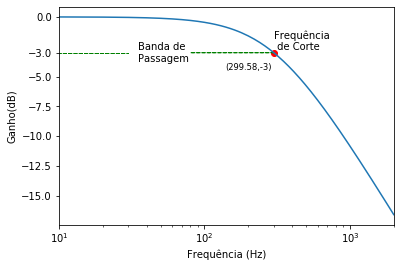

In [324]:
graphGain(df["Freq"], df["Ganho"], 299.58, -3) 

### 3) Grapher Gain

In [278]:
def graphGain(x, y, f_c, Gain_cut):
    
    plt.scatter(f_c, Gain_cut, c = 'r' , marker = 'o') #plota a frequencia de corte
    plt.plot(x, y)#plota o gráfico inteiro 
    
    plt.xscale("log")#escala de x
    
    plt.yticks([0, -3, -5, -7.5, -10, -12.5, -15])
    
    plt.annotate("Frequência \n de Corte", xy = (f_c, Gain_cut+0.2)) #Anota a frequencia de corte
    plt.annotate("("+str(round(f_c,2))+","+str(round(Gain_cut,3))+")",xy = (f_c-160, Gain_cut-1.4),
                 fontsize="small") #anota as coordenadas
    
    plt.arrow(30, -3, -50 , 0, length_includes_head = True, linestyle = '--', color = 'g')#Banda de passagem
    plt.arrow(80, -3, 220 , 0, length_includes_head = True, linestyle = '--', color = 'g')
    plt.annotate("Banda de\nPassagem", xy = (35, -3.775)) 
    
    
    plt.xlim(10,2000) #ajusta os eixos 
    
    #Legendas
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Ganho(dB)")
    
    #salva a figura
    plt.savefig("GraficoGanhoRC", dpi = 400)
    
    plt.show()

### 6) Graph Phase

In [320]:
def graphPhase(x, y, f_c, Ph_c):
    
    plt.scatter(f_c, Ph_c, c = 'r' , marker = 'o') #plota a frequencia de corte
    plt.plot(x, y, linestyle ="--")#plota o gráfico inteiro 
    
    plt.xscale("log")#escala de x
    
    
    plt.annotate("Frequência \n de Corte", xy = (f_c+100,float(Ph_c)+0.2)) #Anota a frequencia de corte
    plt.annotate("("+str(round(f_c,2))+","+str(round(float(Ph_c),3))+")",xy = (f_c+100, Ph_c-5),
                 fontsize="small") #anota as coordenadas
    
    plt.arrow(30, -45, -50 , 0, length_includes_head = True, linestyle = '--', color = 'g')#Banda de passagem
    plt.arrow(80, -45, 220 , 0, length_includes_head = True, linestyle = '--', color = 'g')
    plt.annotate("Banda de\nPassagem", xy = (35, -47)) 
    
    plt.yticks([0, -10, -20, -30, -40, -45, -50, -60, -70, -80, -90])
    
    plt.xlim(10,2000) #ajusta os eixos 
    
    #Legendas
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Fase(°)")
    
    #salva a figura
    plt.savefig("GraficoFaseRC", dpi = 400)
    
    plt.show()

In [321]:
Ph_c = df[df["Freq"] == 300]["Fase"]


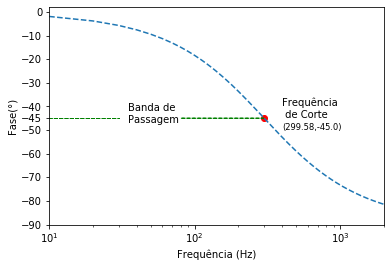

In [326]:
graphPhase(df["Freq"], df["Fase"], 299.58, -45)

In [318]:
df1 = df.drop("Modulo", axis = 1)

df1 = df1[(df1["Freq"]<=50) | ((df1["Freq"]<=320) & (270<=df1["Freq"])) | (df1["Freq"]==1000) | (df1["Freq"] == 1500) | (df["Freq"]==2000)]

In [319]:
print(df1.to_latex(index = False))

\begin{tabular}{rrr}
\toprule
   Freq &      Ganho &       Fase \\
\midrule
   10.0 &  -0.004813 &  -1.907295 \\
   20.0 &  -0.019222 &  -3.810373 \\
   30.0 &  -0.043130 &  -5.705070 \\
   40.0 &  -0.076382 &  -7.587336 \\
   50.0 &  -0.118764 &  -9.453277 \\
  270.0 &  -2.573002 & -41.959465 \\
  280.0 &  -2.717059 & -42.997230 \\
  290.0 &  -2.861478 & -44.001091 \\
  300.0 &  -3.006072 & -44.972097 \\
  310.0 &  -3.150672 & -45.911302 \\
  320.0 &  -3.295125 & -46.819764 \\
 1000.0 & -10.824079 & -73.285390 \\
 1500.0 & -14.141599 & -78.679331 \\
 2000.0 & -16.566534 & -81.461044 \\
\bottomrule
\end{tabular}

